In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [247]:
grid_size = 350

δ = 1.5
θ = 15.0
κ = 50.0

def c(x):
    return np.exp(θ * x) - 1 #x**(θ + 1) / (θ + 1)

s_grid = np.linspace(0, 1, grid_size)

In [248]:
def T(p):
    
    pf = lambda x: np.interp(x, s_grid, p)
    Tp = np.empty_like(p)
    
    for i, s in enumerate(s_grid):
        ell_grid = np.linspace(0, s, grid_size)
        Tp[i] = np.min(c(ell_grid) + δ * pf(s - ell_grid) + κ * (ell_grid > 0.0))
        
    return Tp

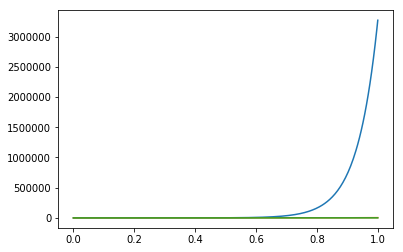

In [249]:
p_init = c(s_grid)

fig, ax = plt.subplots()
ax.plot(s_grid, p_init)
Tp = T(p_init)
ax.plot(s_grid, Tp)
TTp = T(Tp)
ax.plot(s_grid, TTp)

plt.show()



In [250]:
p = c(s_grid)

tol = 1e-4
error = tol + 1
max_iter = 2000
i = 0

while error > tol and i < max_iter:
    Tp = T(p)
    error = np.max(np.abs(Tp - p))
    
    if i % 25 == 0:
        print(i, error)
    i += 1
    p = Tp
    
print(f"final error = {error}")

0 3264539.8986586174
final error = 0.0


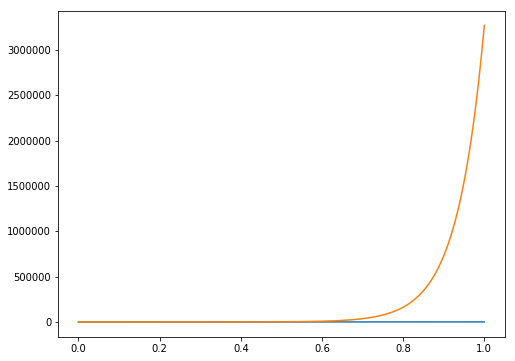

In [251]:
fix, ax = plt.subplots(figsize=(8, 6))
ax.plot(s_grid, p)
ax.plot(s_grid, c(s_grid) + κ)
plt.show()

In [252]:
pf = lambda x: np.interp(x, s_grid, p)

def t_star(s):
    ell_grid = np.linspace(0, s, grid_size)
    i = np.argmin(c(ell_grid) + δ * pf(s - ell_grid) + κ * (ell_grid > 0.0))
    return s - ell_grid[i]

In [253]:
def compute_stages():
    s = 1.0
    transaction_stages = [s]
    while s > 0:
        s = t_star(s)
        transaction_stages.append(s)
    return transaction_stages

def plot_prices(plottype='-', label=None):
    plt.plot(s_grid, p, plottype, label=label)
    transaction_stages = compute_stages()
    for s in transaction_stages:
        plt.axvline(x=s, c="0.5")
    plt.show()

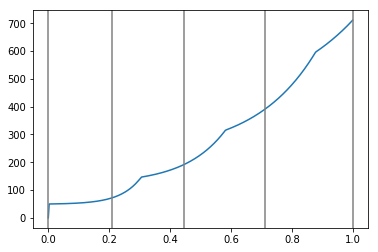

In [254]:
plot_prices()

In [221]:
np.diff(compute_stages())

array([-0.33524355, -0.3333306 , -0.33142585])

In [222]:
compute_stages()

[1.0, 0.664756446991404, 0.3314258503624765, 0.0]